<a href="https://colab.research.google.com/github/adilsaid64/Data-Analysis-and-Machine-Learning-Courses/blob/main/New%20York%202015%20Tree%20Cencus%20Data/2015_Street_Tree_Cencus_Tree_data_in_New_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2015 Street Tree Cencus - Tree data in New York

- Find intresting insights from the datasets
- Clean the datasets

##Importing the data

In [23]:
data_path = "/content/2015_Street_Tree_Census_-_Tree_Data.csv"

In [2]:
import pandas as pd

df = pd.read_csv(data_path)

In [68]:
pd.set_option("display.max_columns", None)

In [5]:
df

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375.0,Forest Hills,406.0,4.0,Queens,29.0,28.0,16.0,QN17,Forest Hills,4073900.0,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357.0,Whitestone,407.0,4.0,Queens,19.0,27.0,11.0,QN49,Whitestone,4097300.0,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211.0,Brooklyn,301.0,3.0,Brooklyn,34.0,50.0,18.0,BK90,East Williamsburg,3044900.0,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211.0,Brooklyn,301.0,3.0,Brooklyn,34.0,53.0,18.0,BK90,East Williamsburg,3044900.0,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215.0,Brooklyn,306.0,3.0,Brooklyn,39.0,44.0,21.0,BK37,Park Slope-Gowanus,3016500.0,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617999,129231,337446,08/08/2015,0,8,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,99-062 211 STREET,11429.0,Queens Village,413.0,4.0,Queens,27.0,33.0,14.0,QN34,Queens Village,4051200.0,New York,40.712143,-73.748078,1.054090e+06,198829.9315,27.0,512.0,4232704.0,4.108780e+09
618000,133150,223523,08/10/2015,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,191 HUNTINGTON STREET,11231.0,Brooklyn,306.0,3.0,Brooklyn,39.0,52.0,25.0,BK33,Carroll Gardens-Columbia Street-Red Hook,3007700.0,New York,40.675616,-73.998404,9.846926e+05,185421.4908,39.0,77.0,3008134.0,3.004740e+09
618001,144425,347939,08/14/2015,0,34,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,NaN,Volunteer,NaN,No,No,No,No,No,No,No,No,No,92-021 71 AVENUE,11375.0,Forest Hills,406.0,4.0,Queens,29.0,28.0,15.0,QN17,Forest Hills,4072900.0,New York,40.711106,-73.850593,1.025671e+06,198386.8707,29.0,729.0,4077116.0,4.032210e+09
618002,121804,300810,08/05/2015,3,0,OnCurb,Alive,Good,Quercus rubra,northern red oak,None,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,43-003 BROADWAY,11103.0,Astoria,401.0,4.0,Queens,26.0,30.0,12.0,QN70,Astoria,4015300.0,New York,40.757823,-73.916407,1.007409e+06,215383.0329,26.0,153.0,4011836.0,4.006930e+09


In [129]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [131]:
#checking for missing values
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages[missing_percentages!=0]

problems            31664
spc_common          31619
spc_latin           31619
health              31616
sidewalk            31616
guards              31616
steward             31615
bbl                  9559
bin                  9559
council district     6519
census tract         6519
dtype: int64

In [132]:
df.dtypes.sort_values()

tree_id               int64
block_id              int64
community board       int64
tree_dbh              int64
stump_diam            int64
borocode              int64
cncldist              int64
st_assem              int64
postcode              int64
st_senate             int64
boro_ct               int64
longitude           float64
x_sp                float64
y_sp                float64
council district    float64
census tract        float64
latitude            float64
bin                 float64
bbl                 float64
trnk_light           object
created_at           object
curb_loc             object
status               object
health               object
spc_latin            object
spc_common           object
state                object
steward              object
nta_name             object
nta                  object
guards               object
sidewalk             object
user_type            object
borough              object
problems             object
root_stone          

In [133]:
round(df.describe(), 2)

,tree_id,block_id,tree_dbh,stump_diam,postcode,community board,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,683788.00,677269.00,677269.00,674229.00,6.742290e+05
mean,365205.01,313793.10,11.28,0.43,10916.25,343.51,3.36,29.94,50.79,20.62,3404914.12,40.70,-73.92,1005279.86,194798.42,30.03,11957.37,3495439.01,3.413414e+09
std,208122.09,114839.02,8.72,3.29,651.55,115.74,1.17,14.33,18.97,7.39,1175863.42,0.09,0.12,34285.05,32902.06,14.30,30745.74,1193274.96,1.174892e+09
min,3.00,100002.00,0.00,0.00,83.00,101.00,1.00,1.00,23.00,10.00,1000201.00,40.50,-74.25,913349.27,120973.79,1.00,1.00,1000000.00,0.000000e+00
25%,186582.75,221556.00,4.00,0.00,10451.00,302.00,3.00,19.00,33.00,14.00,3011700.00,40.63,-73.98,989657.84,169515.15,19.00,202.00,3031991.00,3.011240e+09
50%,366214.50,319967.00,9.00,0.00,11214.00,402.00,4.00,30.00,52.00,21.00,4008100.00,40.70,-73.91,1008386.23,194560.25,30.00,516.00,4020352.00,4.008560e+09
75%,546170.25,404624.00,16.00,0.00,11365.00,412.00,4.00,43.00,64.00,25.00,4103202.00,40.76,-73.83,1029991.28,217019.57,43.00,1417.00,4263123.00,4.105700e+09
max,722694.00,999999.00,450.00,140.00,11697.00,503.00,5.00,51.00,87.00,36.00,5032300.00,40.91,-73.70,1067247.62,271894.09,51.00,157903.00,5515124.00,5.080500e+09


In [4]:
#missing values
df.isna().sum()

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

In [5]:
df[df["health"].isna()]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
37,211205,302080,09/09/2015,0,16,OnCurb,Stump,NaN,NaN,NaN,...,4009500,New York,40.774993,-73.922037,1.005843e+06,221637.1447,22.0,95.0,4019192.0,4.008740e+09
57,187807,506266,08/29/2015,0,0,OnCurb,Dead,NaN,NaN,NaN,...,2042500,New York,40.871927,-73.882349,1.016788e+06,256965.9677,11.0,415.0,2016979.0,2.032990e+09
196,208322,222858,09/07/2015,10,0,OnCurb,Dead,NaN,NaN,NaN,...,3044500,New York,40.705742,-73.917849,1.007027e+06,196407.8326,37.0,445.0,3073739.0,3.032390e+09
209,209058,415850,09/08/2015,6,0,OnCurb,Dead,NaN,NaN,NaN,...,5012806,New York,40.559061,-74.106038,9.547857e+05,142975.3788,50.0,12806.0,5056700.0,5.040740e+09
239,203597,301947,09/04/2015,0,15,OnCurb,Stump,NaN,NaN,NaN,...,4011700,New York,40.772483,-73.909073,1.009435e+06,220726.1774,22.0,117.0,4015864.0,4.008060e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,108193,08/18/2015,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,...,1015801,New York,40.785136,-73.951109,9.977894e+05,225326.7807,5.0,15801.0,1048443.0,1.015230e+09
683695,170888,231931,08/24/2015,0,5,OnCurb,Stump,NaN,NaN,NaN,...,3079400,New York,40.647154,-73.955619,9.965658e+05,175055.1250,40.0,794.0,3117748.0,3.051270e+09
683697,177922,410634,08/26/2015,0,17,OnCurb,Stump,NaN,NaN,NaN,...,5017600,New York,40.528544,-74.165246,9.383125e+05,131882.7120,51.0,176.0,5081744.0,5.063570e+09
683698,193791,208850,09/01/2015,3,0,OnCurb,Dead,NaN,NaN,NaN,...,3038600,New York,40.590385,-73.972892,9.917788e+05,154370.9206,47.0,386.0,3194400.0,3.071730e+09


##Exploratory Analysis and Visualization

picking some columns to analysis: 
- Health
- Status
- spc_common
- tree_dbh
- problems,root_stone, root_grate,	root_other,	trunk_wire,	trnk_light,	trnk_other,	brch_light,	brch_shoe,	brch_other

In [134]:
df.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

####Health

In [135]:
#checking the gradings
df.health.unique()

array(['Fair', 'Good', 'Poor', nan], dtype=object)

In [136]:
#count for each grading
df.health.value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

In [137]:
#to get as a precentage
(df.health.value_counts()/len(df.health.values))*100

Good    77.341223
Fair    14.113146
Poor     3.921976
Name: health, dtype: float64

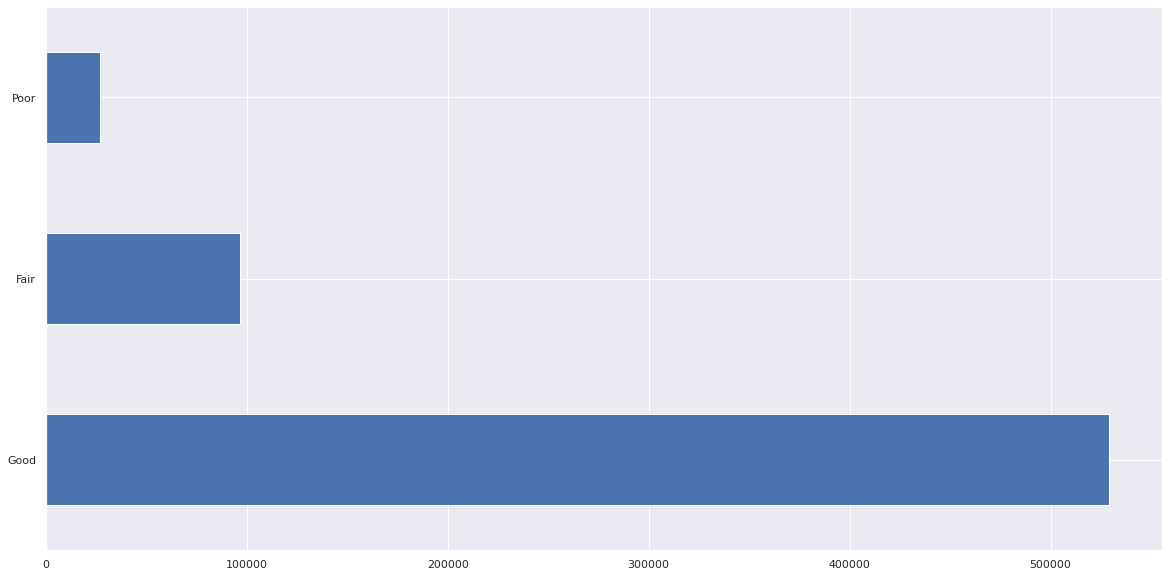

In [140]:
df.health.value_counts().plot(kind = "barh", figsize = (20,10))

A map of the health of the trees?

In [9]:
import seaborn as sns
sns.set_style("darkgrid")

In [10]:
sns.set(rc={'figure.figsize':(20,10)})

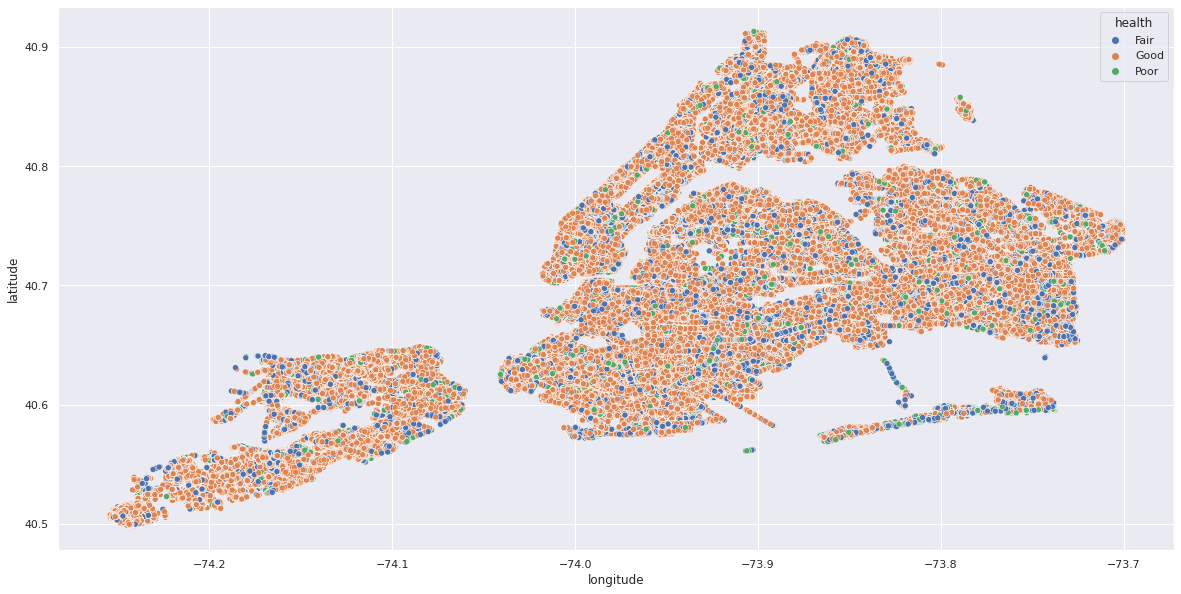

In [142]:
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue = df["health"])

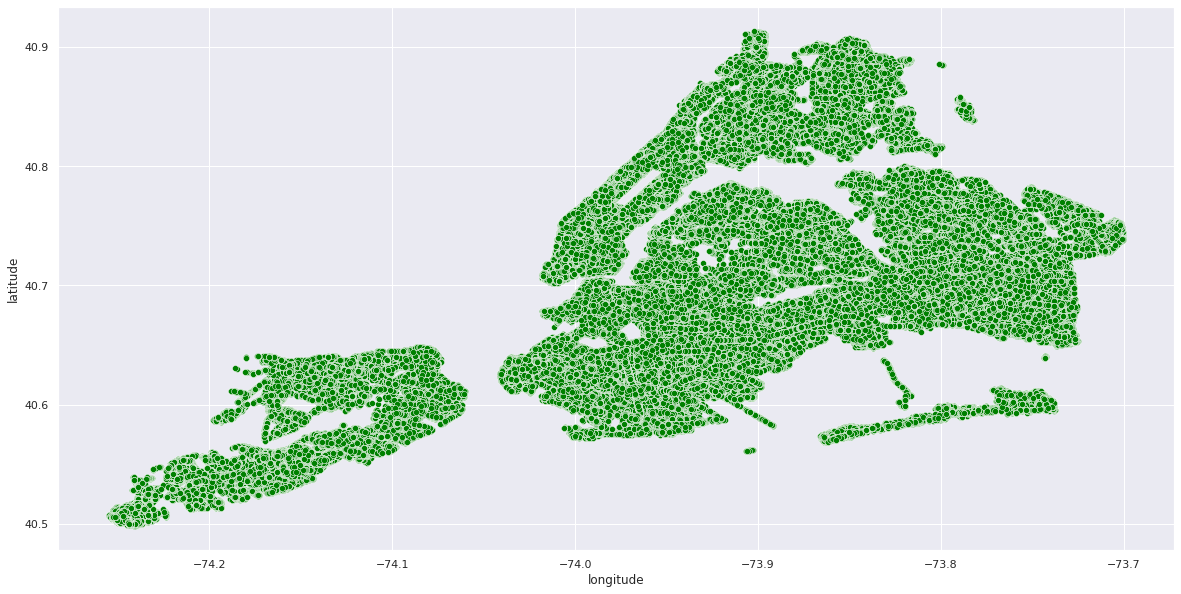

In [294]:
sns.scatterplot(x = df['longitude'], y = df['latitude'], data = df.health[df.health=="Poor"], color = "green")

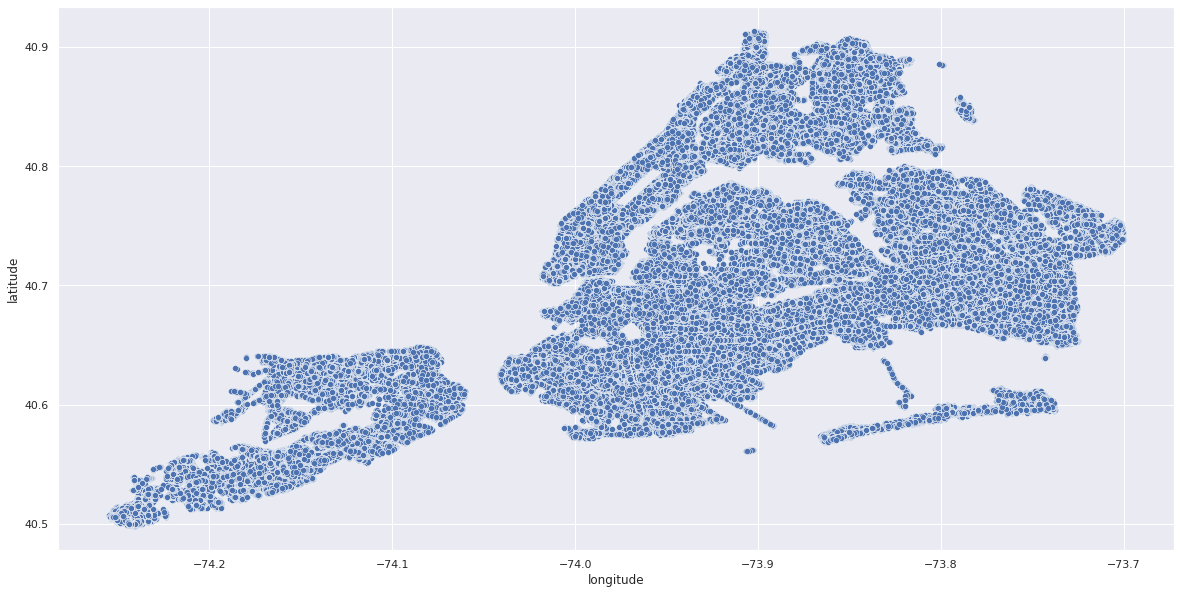

In [295]:
sns.scatterplot(x = df['longitude'], y = df['latitude'], data = df.health[df.health=="Fair"])

####Status

In [143]:
df.status

0         Alive
1         Alive
2         Alive
3         Alive
4         Alive
          ...  
683783    Alive
683784    Alive
683785    Alive
683786    Alive
683787    Alive
Name: status, Length: 683788, dtype: object

In [144]:
df.status.unique()

array(['Alive', 'Stump', 'Dead'], dtype=object)

In [145]:
df.status.value_counts()

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [146]:
(df.status.value_counts()/len(df.status))*100

Alive    95.376491
Stump     2.581794
Dead      2.041715
Name: status, dtype: float64

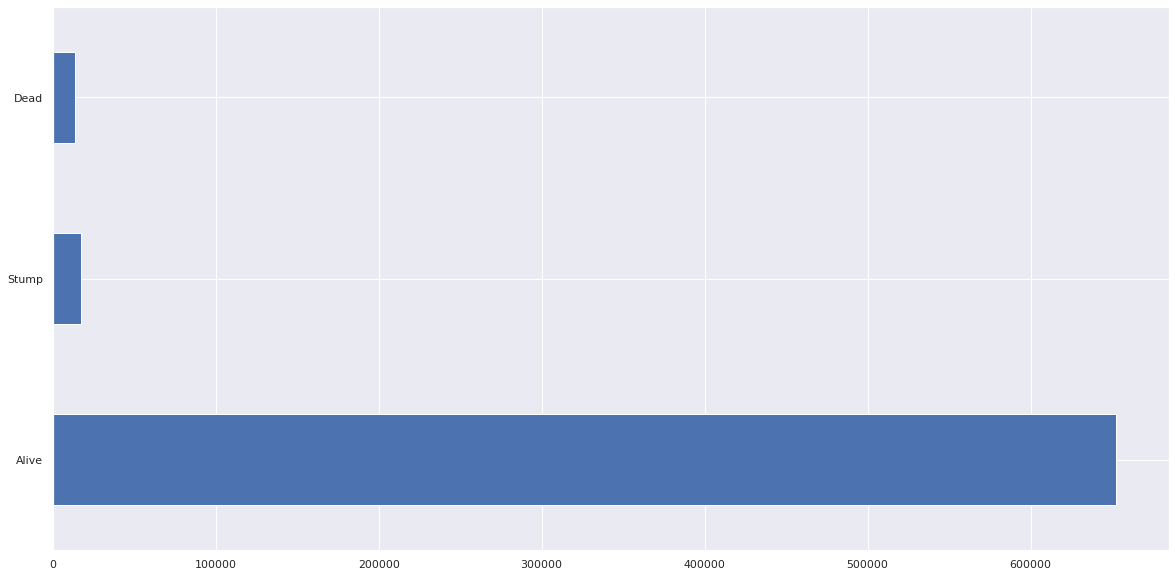

In [147]:
df.status.value_counts().plot(kind = "barh", figsize = (20,10))

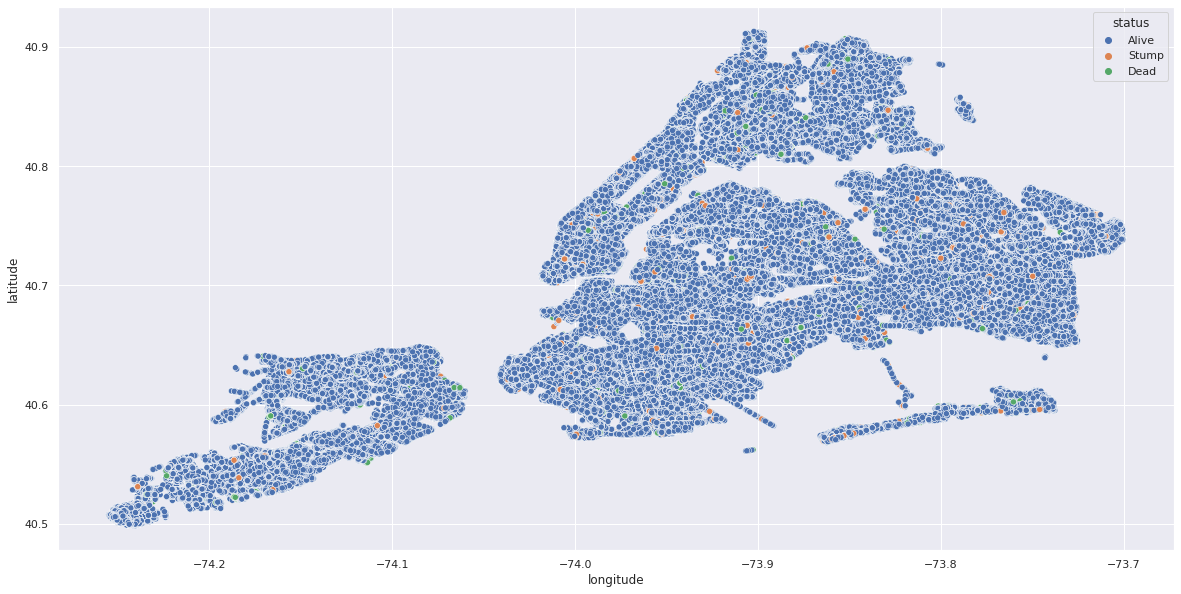

In [148]:
sns.scatterplot(x = df['longitude'], y = df['latitude'], hue = df["status"])

####spc_common

In [149]:
df.spc_common.unique()

array(['red maple', 'pin oak', 'honeylocust', 'American linden',
       'London planetree', 'ginkgo', 'willow oak', 'sycamore maple',
       'Amur maple', nan, 'hedge maple', 'American elm', 'ash',
       'crab apple', 'silver maple', 'Turkish hazelnut', 'black cherry',
       'eastern redcedar', 'Norway maple', 'tulip-poplar', 'sawtooth oak',
       'swamp white oak', 'Sophora', 'Chinese fringetree',
       'southern magnolia', 'sweetgum', 'Callery pear', 'scarlet oak',
       'Atlantic white cedar', 'black oak', 'Japanese zelkova',
       'white oak', 'Ohio buckeye', 'northern red oak', 'silver linden',
       'pignut hickory', 'Kentucky yellowwood', 'mulberry', 'Douglas-fir',
       'crepe myrtle', 'sassafras', 'cherry', 'spruce', 'Chinese elm',
       'horse chestnut', 'holly', 'littleleaf linden', 'white pine',
       'blackgum', 'Japanese tree lilac', 'hardy rubber tree',
       'green ash', 'English oak', 'white ash', 'golden raintree',
       "Schumard's oak", 'Siberian elm', '

In [150]:
df.spc_common.value_counts()

London planetree    87014
honeylocust         64264
Callery pear        58931
pin oak             53185
Norway maple        34189
                    ...  
black pine             37
pitch pine             33
Osage-orange           29
Scots pine             25
Virginia pine          10
Name: spc_common, Length: 132, dtype: int64

In [11]:
df.spc_common.value_counts()/len(df.spc_common)

London planetree    0.128392
honeylocust         0.090826
Callery pear        0.086812
pin oak             0.077799
Norway maple        0.051089
                      ...   
black pine          0.000060
pitch pine          0.000053
Osage-orange        0.000042
Scots pine          0.000032
Virginia pine       0.000015
Name: spc_common, Length: 132, dtype: float64

In [174]:
len(df.spc_common.unique())

133

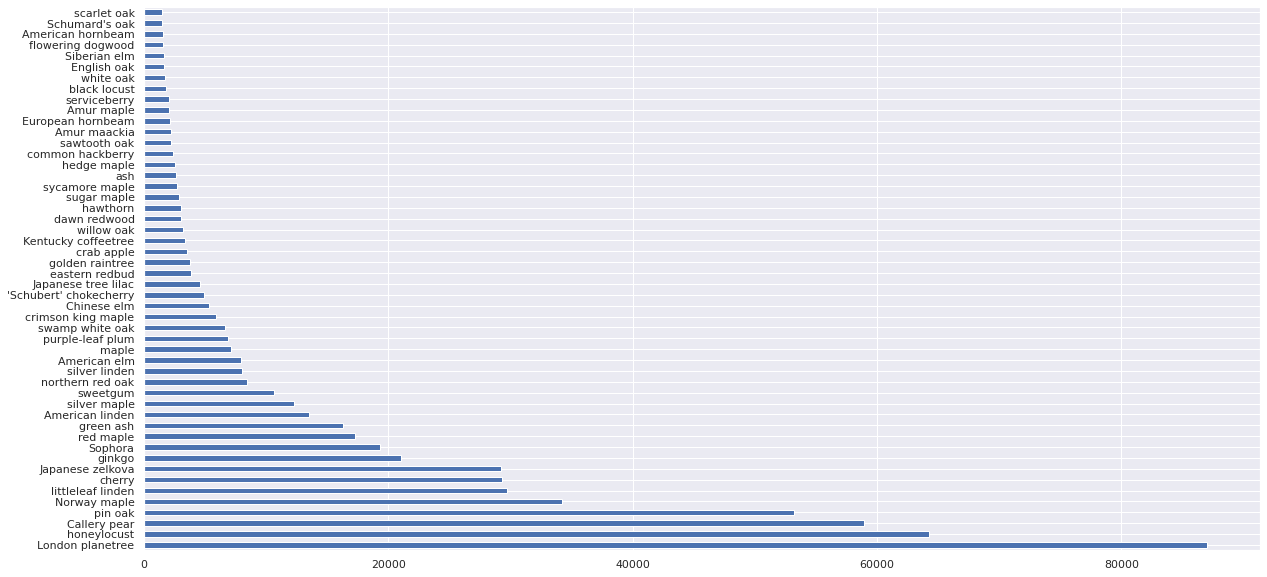

In [172]:
#plotting the top 50 most common trees.
df.spc_common.value_counts()[:50].plot(kind = "barh", figsize = (20,10))

####tree_dbh

In [199]:
df.tree_dbh

0          3
1         21
2          3
3         10
4         21
          ..
683783    25
683784     7
683785    12
683786     9
683787    23
Name: tree_dbh, Length: 683788, dtype: int64

In [200]:
df.tree_dbh.describe()

count    683788.000000
mean         11.279787
std           8.723042
min           0.000000
25%           4.000000
50%           9.000000
75%          16.000000
max         450.000000
Name: tree_dbh, dtype: float64

450 inches for a diameter, is alot. Could it be a mistake when someone was entering the data?

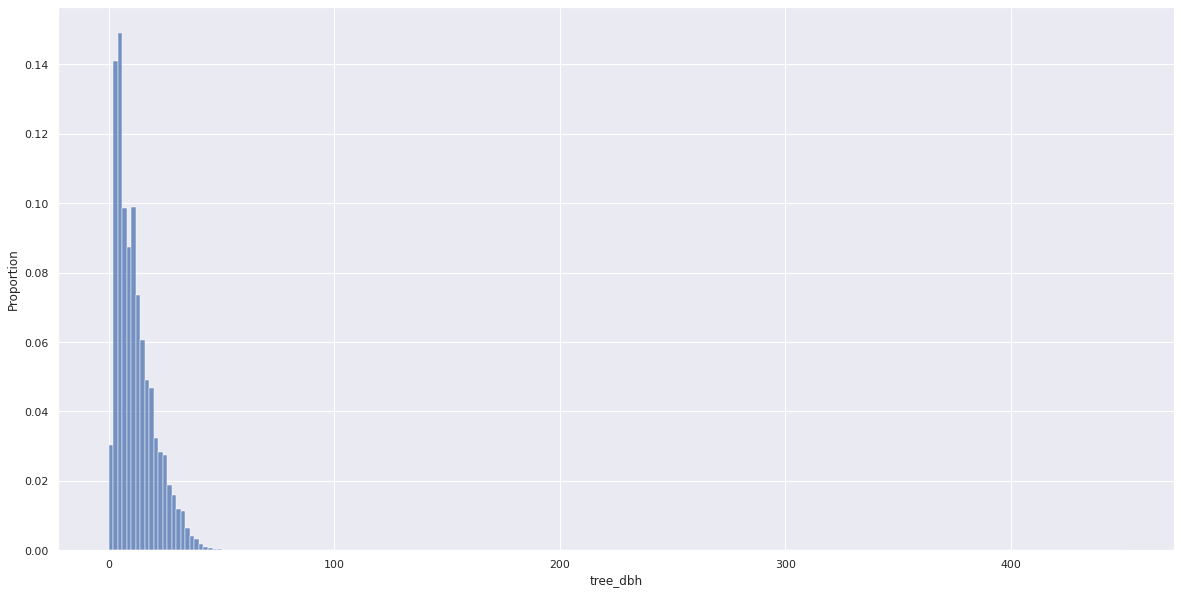

In [252]:
sns.histplot(df.tree_dbh, stat = "proportion", binwidth = 2)

In [264]:
df.tree_dbh[df.tree_dbh<=20].count()/len(df.tree_dbh)

0.8521237576558817

In [265]:
df.tree_dbh[df.tree_dbh<=3].count()/len(df.tree_dbh)

0.17148882402148033

In [7]:
big_trees = df[df["tree_dbh"]>50]
big_trees

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
2405,168583,226040,08/23/2015,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,...,3033900,New York,40.672287,-73.946936,9.989698e+05,184212.9905,35.0,339.0,3031981.0,3.012490e+09
3738,199546,315695,09/03/2015,51,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,...,4099100,New York,40.789872,-73.803291,1.038720e+06,227109.5800,19.0,991.0,4103727.0,4.045590e+09
4887,139665,409474,08/12/2015,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,...,5011202,New York,40.572363,-74.091712,9.587713e+05,147816.9196,50.0,11202.0,5054748.0,5.038120e+09
6724,209349,415127,09/08/2015,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,5012806,New York,40.562379,-74.115959,9.520303e+05,144187.7691,50.0,12806.0,5109721.0,5.040010e+09
10083,215075,515054,09/11/2015,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,2042800,New York,40.894886,-73.847206,1.026493e+06,265345.9703,12.0,428.0,2069059.0,2.050170e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,322014,08/27/2015,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,...,4113900,New York,40.762782,-73.788133,1.042941e+06,217249.7581,19.0,1139.0,4120138.0,4.053180e+09
677954,166796,348127,08/22/2015,54,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,...,4076902,New York,40.714634,-73.834046,1.030256e+06,199680.4845,29.0,76902.0,4079969.0,4.033440e+09
679894,169501,312374,08/23/2015,51,0,OnCurb,Alive,Good,Quercus alba,white oak,...,4086500,New York,40.763128,-73.825290,1.032648e+06,217353.2642,20.0,865.0,4113294.0,4.050100e+09
681736,179366,349326,08/27/2015,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4074300,New York,40.734074,-73.850752,1.025612e+06,206754.6210,29.0,743.0,4051423.0,4.021470e+09


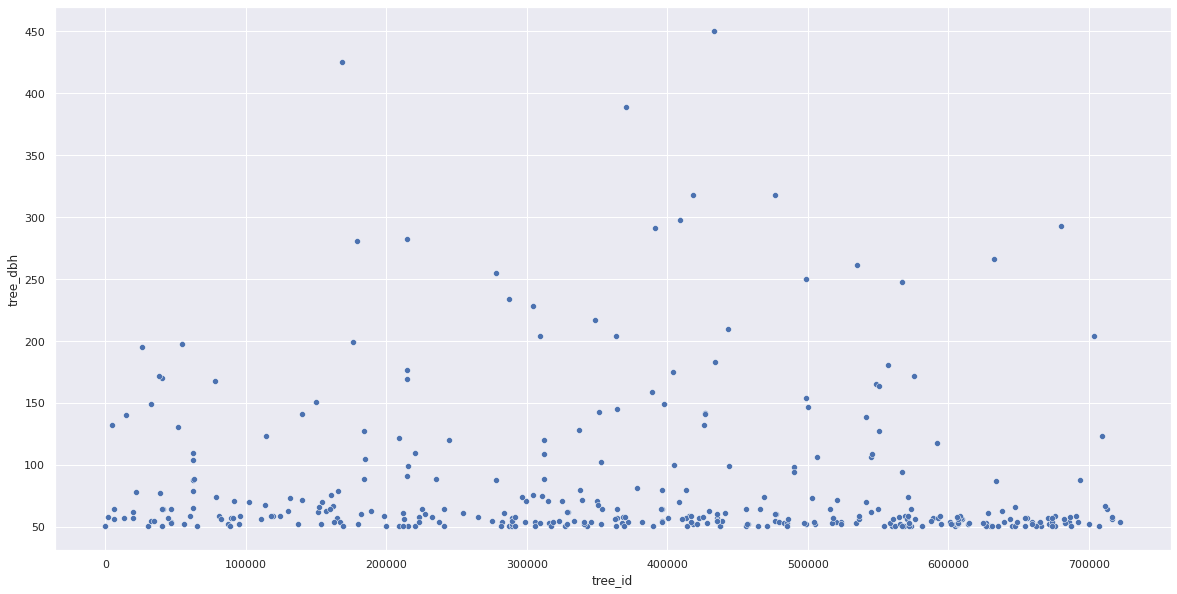

In [12]:
sns.scatterplot(x = big_trees["tree_id"], y =big_trees["tree_dbh"])

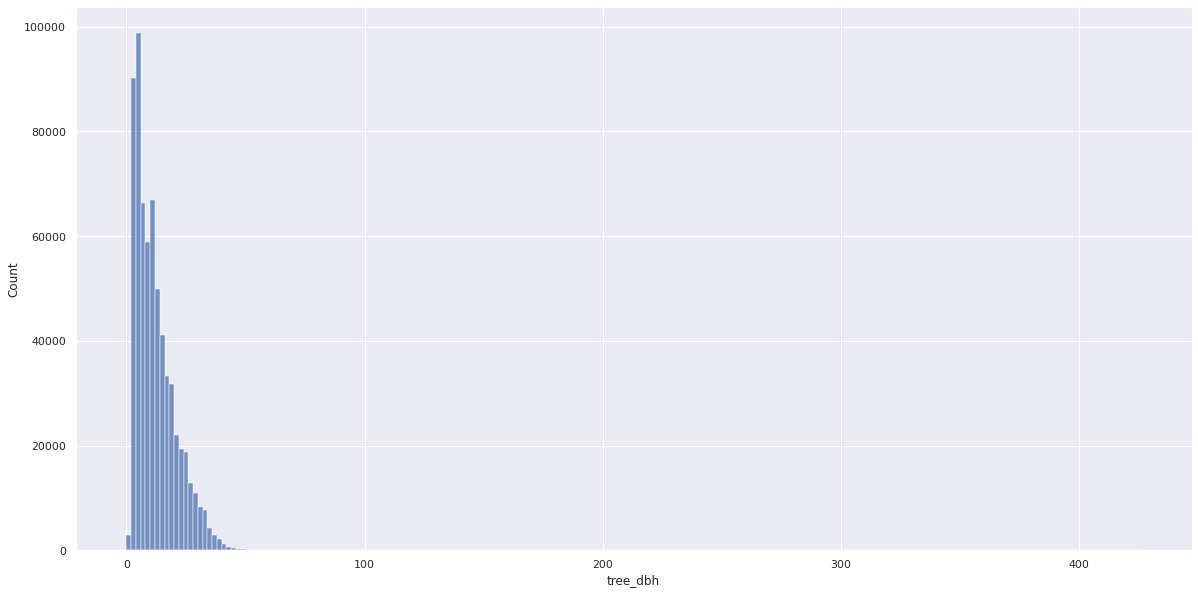

In [277]:
#looking at diamters of trees that are alive
sns.histplot(df.tree_dbh[df.status=="Alive"], binwidth = 2)

In [278]:
df.tree_dbh[df.status=="Alive"][df.tree_dbh<=15].count()

474887

In [279]:
df.tree_dbh[df.status=="Alive"][df.tree_dbh<=4].count()

151101

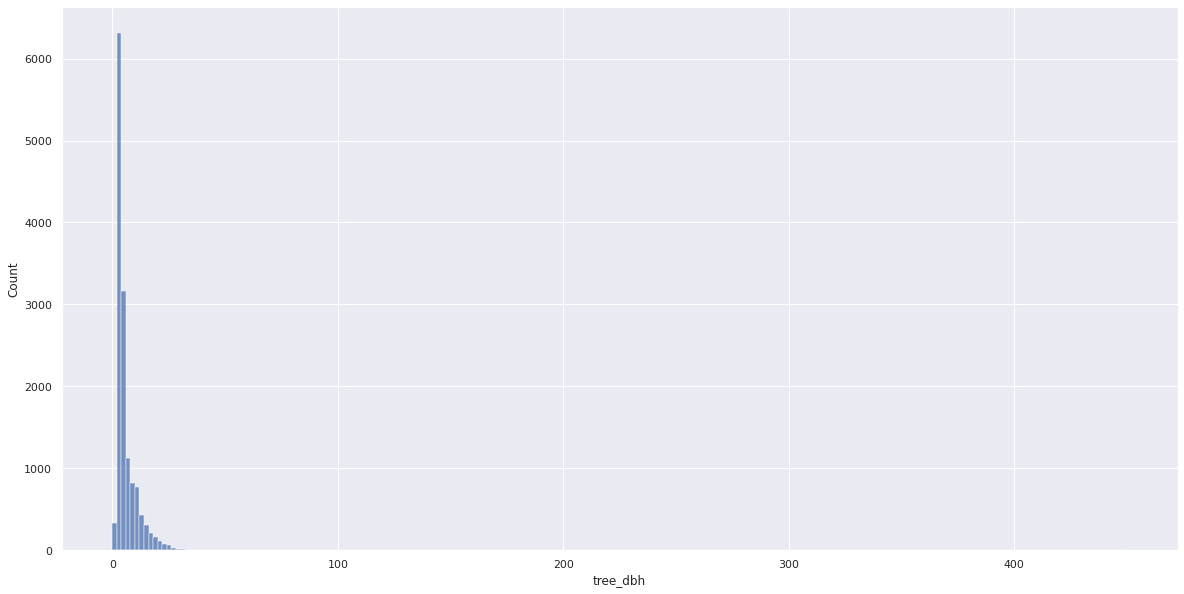

In [282]:
sns.histplot(df.tree_dbh[df.status=="Dead"], binwidth =2)

####Problem

In [283]:
df.problems

0           None
1         Stones
2           None
3         Stones
4         Stones
           ...  
683783      None
683784      None
683785      None
683786      None
683787      None
Name: problems, Length: 683788, dtype: object

In [284]:
df.problems.unique()

array(['None', 'Stones', 'MetalGrates', 'RootOther', 'Stones,BranchOther',
       'TrunkLights,BranchLights', 'RootOther,TrunkOther,BranchOther',
       'BranchOther', 'Stones,BranchLights', 'TrunkOther,BranchLights',
       'MetalGrates,TrunkOther', nan, 'TrunkOther', 'Stones,WiresRope',
       'BranchLights', 'WiresRope,BranchOther', 'RootOther,BranchOther',
       'Stones,WiresRope,BranchLights', 'WiresRope',
       'WiresRope,BranchLights', 'Stones,TrunkOther',
       'WiresRope,TrunkLights,BranchLights', 'Stones,RootOther',
       'Stones,BranchLights,BranchOther', 'Stones,RootOther,BranchLights',
       'MetalGrates,BranchOther', 'Stones,RootOther,TrunkOther',
       'RootOther,TrunkOther',
       'Stones,TrunkOther,BranchLights,BranchOther',
       'Stones,TrunkOther,BranchOther', 'RootOther,BranchLights',
       'TrunkOther,BranchOther', 'RootOther,WiresRope,BranchLights',
       'Stones,TrunkOther,BranchLights', 'BranchLights,Sneakers',
       'Stones,RootOther,TrunkOther,Bran

In [287]:
#precentage of each problem
df.problems.value_counts()/len(df.problems)

None                                                                          0.623410
Stones                                                                        0.139916
BranchLights                                                                  0.043072
Stones,BranchLights                                                           0.026043
RootOther                                                                     0.016698
                                                                                ...   
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther    0.000001
MetalGrates,RootOther,WiresRope,TrunkLights,BranchLights,BranchOther          0.000001
MetalGrates,WiresRope,TrunkLights,BranchLights,BranchOther                    0.000001
Stones,MetalGrates,TrunkLights,TrunkOther                                     0.000001
MetalGrates,TrunkOther,Sneakers                                               0.000001
Name: problems, Length: 232, dtype: float64

In [290]:
#Problem for alive trees
df.problems[df.status=="Alive"].value_counts()/len(df.problems[df.status=="Alive"])

None                                                                          0.653630
Stones                                                                        0.146699
BranchLights                                                                  0.045160
Stones,BranchLights                                                           0.027306
RootOther                                                                     0.017508
                                                                                ...   
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther    0.000002
MetalGrates,RootOther,WiresRope,TrunkLights,BranchLights,BranchOther          0.000002
MetalGrates,WiresRope,TrunkLights,BranchLights,BranchOther                    0.000002
Stones,MetalGrates,TrunkLights,TrunkOther                                     0.000002
MetalGrates,TrunkOther,Sneakers                                               0.000002
Name: problems, Length: 232, dtype: float64

In [20]:
#looking at distribution of problems
tree_problems = df[["root_stone", "root_grate", "root_other", "trunk_wire", "trnk_light", "trnk_other", "brch_light", "brch_shoe",  "brch_other"]]
tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


In [21]:
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


We 

###other

In [22]:
df["curb_loc"].value_counts()/len(df)

OnCurb            0.960672
OffsetFromCurb    0.039328
Name: curb_loc, dtype: float64

##Data Cleaning
- Look at removing Dead or Stump trees from the data set if you wanted to
- Focus more on replacing "Not Applicable" values to Dead and Stump trees in certain comlumns like Health. To get rid of NaN values.

####Removing Rows
-To remove all NaN values, since we know most of them are from Dead Or Stump. (This is more so for future reference)


In [57]:
df_new = df[df["status"]!="Dead"]
df_new = df_new[df["status"]!="Stump"] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [53]:
df_new["status"].value_counts()

Alive    652173
Name: status, dtype: int64

####Clearing Missing Values
-Fill in NaN values when a tree is either Dead or Stump as "Not Applicable"

In [56]:
df_new.isna().sum()

tree_id                0
block_id               0
created_at             0
tree_dbh               0
stump_diam             0
curb_loc               0
status                 0
health                 1
spc_latin              5
spc_common             5
steward                0
guards                 1
sidewalk               1
user_type              0
problems              49
root_stone             0
root_grate             0
root_other             0
trunk_wire             0
trnk_light             0
trnk_other             0
brch_light             0
brch_shoe              0
brch_other             0
address                0
postcode               0
zip_city               0
community board        0
borocode               0
borough                0
cncldist               0
st_assem               0
st_senate              0
nta                    0
nta_name               0
boro_ct                0
state                  0
latitude               0
longitude              0
x_sp                   0


In [61]:
mask = ((df["status"]=="Stump")  | (df["status"]=="Dead"))

In [75]:
#This is a how you apply to only specific column.
#df.loc[mask, "health"] = df.loc[mask, "health"].fillna("Not Applicable")

#This will look at all the columns and change what ever is NaN for stump or dead to  "Not Applicable"
df.loc[mask] = df.loc[mask].fillna("Not Applicable")



In [76]:
df[df["status"]=="Stump"]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
37,211205,302080,09/09/2015,0,16,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,21-023 24 DRIVE,11102,Astoria,401,4,Queens,22,36,12,QN72,Steinway,4009500,New York,40.774993,-73.922037,1.005843e+06,221637.1447,22.0,95.0,4019192.0,4008740045.0
239,203597,301947,09/04/2015,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable,No,No,No,No,No,No,No,No,No,22-063 37 STREET,11105,Astoria,401,4,Queens,22,36,13,QN72,Steinway,4011700,New York,40.772483,-73.909073,1.009435e+06,220726.1774,22.0,117.0,4015864.0,4008060007.0
641,179766,230466,08/27/2015,0,30,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,2676 BEDFORD AVENUE,11210,Brooklyn,314,3,Brooklyn,45,42,21,BK42,Flatbush,3077000,New York,40.637379,-73.953814,9.970686e+05,171494.1029,45.0,770.0,3120745.0,3052240054.0
644,180619,348834,08/27/2015,0,10,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,113-001 JEWEL AVENUE,11375,Forest Hills,406,4,Queens,29,27,15,QN17,Forest Hills,4075702,New York,40.725300,-73.839376,1.028771e+06,203563.6300,29.0,75702.0,4052666.0,4022430039.0
646,208828,107238,09/08/2015,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable,No,No,No,No,No,No,No,No,No,301 EAST 66 STREET,10065,New York,108,1,Manhattan,5,76,28,MN31,Lenox Hill-Roosevelt Island,1011800,New York,40.764914,-73.960857,9.950930e+05,217957.8614,5.0,118.0,1044738.0,1014417501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,217718,08/17/2015,0,13,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable,No,No,No,No,No,No,No,No,No,281 SOUTH 2 STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3052300,New York,40.711246,-73.956418,9.963323e+05,198405.4546,34.0,523.0,3063024.0,3024090022.0
683686,191219,321689,08/31/2015,0,25,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,NYC Parks Staff,Not Applicable,No,No,No,No,No,No,No,No,No,43-035 216 STREET,11361,Bayside,411,4,Queens,19,26,11,QN46,Bayside-Bayside Hills,4147100,New York,40.761032,-73.765688,1.049161e+06,216628.0173,19.0,1471.0,4138506.0,4063100033.0
683695,170888,231931,08/24/2015,0,5,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,2327 BEDFORD AVENUE,11226,Brooklyn,317,3,Brooklyn,40,42,21,BK95,Erasmus,3079400,New York,40.647154,-73.955619,9.965658e+05,175055.1250,40.0,794.0,3117748.0,3051270073.0
683697,177922,410634,08/26/2015,0,17,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Volunteer,Not Applicable,No,No,No,No,No,No,No,No,No,419 HOLDRIDGE AVENUE,10312,Staten Island,503,5,Staten Island,51,62,24,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,5017600,New York,40.528544,-74.165246,9.383125e+05,131882.7120,51.0,176.0,5081744.0,5063570007.0


In [77]:
#Checking for more missing values
df.isna().sum()

tree_id                0
block_id               0
created_at             0
tree_dbh               0
stump_diam             0
curb_loc               0
status                 0
health                 1
spc_latin              5
spc_common             5
steward                0
guards                 1
sidewalk               1
user_type              0
problems              49
root_stone             0
root_grate             0
root_other             0
trunk_wire             0
trnk_light             0
trnk_other             0
brch_light             0
brch_shoe              0
brch_other             0
address                0
postcode               0
zip_city               0
community board        0
borocode               0
borough                0
cncldist               0
st_assem               0
st_senate              0
nta                    0
nta_name               0
boro_ct                0
state                  0
latitude               0
longitude              0
x_sp                   0


Still have a few missing values

In [78]:
df[df["health"].isna()]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
32889,245041,413012,09/21/2015,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,green ash,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,84 LUCILLE AVENUE,10309,Staten Island,503,5,Staten Island,51,62,24,SI32,Rossville-Woodrow,5020801,New York,40.548597,-74.216412,924106.8808,139219.632,51.0,20801.0,5086132.0,5070480075.0


In [79]:
df[df["sidewalk"].isna()]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
346299,540677,202468,12/29/2015,7,0,OffsetFromCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,NaN,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1220 LIBERTY AVENUE,11208,Brooklyn,305,3,Brooklyn,37,54,19,QN56,Ozone Park,3118800,New York,40.67909,-73.864029,1021964.091,186716.496,37.0,1188.0,3094522.0,3042060017.0


In [80]:
df[df["problems"].isna()]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
120289,332668,304363,10/15/2015,30,0,OffsetFromCurb,Alive,Fair,Quercus palustris,pin oak,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,37-001 69 STREET,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748543,-73.896588,1.012903e+06,212008.0524,26.0,263.0,4029727.0,4012820090.0
121488,332669,304363,10/15/2015,28,0,OffsetFromCurb,Alive,Fair,Quercus palustris,pin oak,1or2,Helpful,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748550,-73.896511,1.012925e+06,212010.4058,26.0,263.0,4029727.0,4012820090.0
121685,332670,304363,10/15/2015,24,0,OffsetFromCurb,Alive,Fair,Quercus palustris,pin oak,1or2,Helpful,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748557,-73.896424,1.012949e+06,212013.0668,26.0,263.0,4029727.0,4012820090.0
133470,332693,304365,10/15/2015,11,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748667,-73.896430,1.012947e+06,212053.0914,26.0,263.0,4029727.0,4012820090.0
133812,332692,304365,10/15/2015,15,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,None,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748635,-73.896356,1.012968e+06,212041.6934,26.0,263.0,4029727.0,4012820090.0
134820,332694,304365,10/15/2015,28,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,69-002 37 AVENUE,11377,Woodside,402,4,Queens,26,34,16,QN50,Elmhurst-Maspeth,4026300,New York,40.748699,-73.896507,1.012926e+06,212064.8751,26.0,263.0,4029727.0,4012820090.0
144137,332947,214076,10/15/2015,3,0,OnCurb,Alive,Good,Ginkgo biloba,ginkgo,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,9217 SEAVIEW AVENUE,11236,Brooklyn,318,3,Brooklyn,46,59,19,BK50,Canarsie,3102400,New York,40.631649,-73.893031,1.013941e+06,169421.4263,46.0,1024.0,3234260.0,3082950003.0
145324,332543,231799,10/15/2015,9,0,OnCurb,Alive,Good,Prunus,cherry,None,None,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,2823 CORTELYOU ROAD,11226,Brooklyn,317,3,Brooklyn,45,42,21,BK95,Erasmus,3082600,New York,40.644541,-73.949941,9.981419e+05,174103.9871,45.0,826.0,3119178.0,3051720011.0
145337,332541,231799,10/15/2015,8,0,OnCurb,Alive,Good,Prunus,cherry,1or2,None,NoDamage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,214 EAST 29 STREET,11226,Brooklyn,317,3,Brooklyn,45,42,21,BK95,Erasmus,3082600,New York,40.644686,-73.949956,9.981376e+05,174157.0169,45.0,826.0,3382044.0,3051720111.0
146314,332542,231799,10/15/2015,8,0,OnCurb,Alive,Good,Prunus,cherry,1or2,None,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,214 EAST 29 STREET,11226,Brooklyn,317,3,Brooklyn,45,42,21,BK95,Erasmus,3082600,New York,40.644612,-73.949949,9.981398e+05,174129.7046,45.0,826.0,3382044.0,3051720111.0


In [81]:
df[df["spc_common"].isna()]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
356613,562532,315837,05/19/2016,4,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,157-021 12 AVENUE,11357,Whitestone,407,4,Queens,19,26,11,QN49,Whitestone,4099100,New York,40.791332,-73.803610,1038630.469,227641.3712,19.0,991.0,4103675.0,4045570024.0
427541,630814,323764,07/18/2016,11,0,OnCurb,Alive,Poor,NaN,NaN,None,NaN,Damage,TreesCount Staff,NaN,No,No,No,No,No,No,No,No,No,38-028 CEDAR LANE,11363,Little Neck,411,4,Queens,19,26,11,QN45,Douglas Manor-Douglaston-Little Neck,4148300,New York,40.771945,-73.750414,1053380.635,220615.7964,19.0,1483.0,4168471.0,4080630058.0
431417,651014,308540,08/02/2016,40,0,OnCurb,Alive,Good,NaN,NaN,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,81-015 91 AVENUE,11421,Woodhaven,409,4,Queens,32,38,15,QN53,Woodhaven,4000800,New York,40.686902,-73.859411,1023240.372,189564.7945,32.0,8.0,4185286.0,4089630063.0
608632,47941,346795,07/03/2015,5,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,NoDamage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,61-032 78 STREET,11379,Middle Village,405,4,Queens,30,30,15,QN21,Middle Village,4067100,New York,40.723484,-73.880296,1017429.853,202884.0907,30.0,671.0,4067282.0,4029350021.0
656960,150745,515014,08/16/2015,3,0,OnCurb,Alive,Good,NaN,NaN,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,662 EAST 234 STREET,10466,Bronx,212,2,Bronx,11,81,36,BX44,Williamsbridge-Olinville,2042000,New York,40.894521,-73.858255,1023438.408,265207.8056,11.0,420.0,2068064.0,2049940068.0


In [90]:
df[df["guards"].isna()]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
427541,630814,323764,07/18/2016,11,0,OnCurb,Alive,Poor,unidentified,unidentified,None,NaN,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,38-028 CEDAR LANE,11363,Little Neck,411,4,Queens,19,26,11,QN45,Douglas Manor-Douglaston-Little Neck,4148300,New York,40.771945,-73.750414,1053380.635,220615.7964,19.0,1483.0,4168471.0,4080630058.0


In [91]:
df["guards"].unique()

array(['None', 'Helpful', 'Harmful', 'Unsure', 'Not Applicable', nan],
      dtype=object)

In [93]:
df["guards"].value_counts()

None              572306
Helpful            51866
Not Applicable     31615
Harmful            20252
Unsure              7748
Name: guards, dtype: int64

- We see  that for health and sidewalk we habe only one missing value. We could remove them. However doing this we also lose alot of other valuable missing information, like the count of number of trees in the city etc. So we want to try keep as much of the data as we can for now. So since the tree is on the curb, we can place the most common health status for trees on the curb.
- For problems we have 49 NaN values. We could replace those with "None" which is a category in this section already. These NaN values could have been placed by mistake.
- For sidewalk, we can use the same approch for health. And replace it with the most common value.
- There are about 5 spc_common/spc_latin NaN values. This could be because, maybe the person survaying couldnt tell what tree it was. We can replace it with "unidentified".
- I replaced the NaN in guard as None.

In [94]:
df["problems"].fillna("None", inplace = True)
df["health"].fillna("Good", inplace = True)
df["spc_common"].fillna("unidentified", inplace = True)
df["spc_latin"].fillna("unidentified", inplace = True)
df["sidewalk"].fillna("NoDamage", inplace = True)
df["guards"].fillna("None", inplace = True)

In [95]:
df.isna().sum()

tree_id                0
block_id               0
created_at             0
tree_dbh               0
stump_diam             0
curb_loc               0
status                 0
health                 0
spc_latin              0
spc_common             0
steward                0
guards                 0
sidewalk               0
user_type              0
problems               0
root_stone             0
root_grate             0
root_other             0
trunk_wire             0
trnk_light             0
trnk_other             0
brch_light             0
brch_shoe              0
brch_other             0
address                0
postcode               0
zip_city               0
community board        0
borocode               0
borough                0
cncldist               0
st_assem               0
st_senate              0
nta                    0
nta_name               0
boro_ct                0
state                  0
latitude               0
longitude              0
x_sp                   0


- The data set is cleaned apart from the last 4 columns. We are not intrested in them at this moment.

####Dealing with Outliers

In [99]:
big_trees = df[(df["tree_dbh"]>60) | (df["stump_diam"]>60)]
big_trees

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
2405,168583,226040,08/23/2015,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,1or2,None,Damage,NYC Parks Staff,None,No,No,No,No,No,No,No,No,No,960 STERLING PLACE,11213,Brooklyn,308,3,Brooklyn,35,43,20,BK61,Crown Heights North,3033900,New York,40.672287,-73.946936,9.989698e+05,184212.9905,35.0,339.0,3031981.0,3012490007.0
4887,139665,409474,08/12/2015,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,52 HEMPSTEAD AVENUE,10306,Staten Island,502,5,Staten Island,50,64,24,SI45,New Dorp-Midland Beach,5011202,New York,40.572363,-74.091712,9.587713e+05,147816.9196,50.0,11202.0,5054748.0,5038120021.0
6466,166008,226028,08/22/2015,0,72,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,NYC Parks Staff,Not Applicable,No,No,No,No,No,No,No,No,No,1103 STERLING PLACE,11213,Brooklyn,308,3,Brooklyn,35,43,25,BK61,Crown Heights North,3033900,New York,40.672036,-73.942237,1.000273e+06,184122.4156,36.0,341.0,3031662.0,3012430043.0
6724,209349,415127,09/08/2015,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,35 PRIMROSE PLACE,10306,Staten Island,503,5,Staten Island,50,64,24,SI25,Oakwood-Oakwood Beach,5012806,New York,40.562379,-74.115959,9.520303e+05,144187.7691,50.0,12806.0,5109721.0,5040010001.0
7042,206818,311117,09/06/2015,0,100,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,TreesCount Staff,Not Applicable,No,No,No,No,No,No,No,No,No,57-009 LAWRENCE STREET,11355,Flushing,407,4,Queens,20,25,16,QN62,Queensboro Hill,4080301,New York,40.747117,-73.833058,1.030507e+06,211515.4586,20.0,80301.0,4139073.0,4063580001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,330826,08/17/2015,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,northern red oak,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,143-094 232 STREET,11413,Springfield Gardens,413,4,Queens,31,31,10,QN03,Springfield Gardens South-Brookville,4068000,New York,40.662039,-73.745916,1.054743e+06,180577.3712,31.0,680.0,4287546.0,4135120041.0
673105,165324,206090,08/22/2015,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,1705 81 STREET,11214,Brooklyn,311,3,Brooklyn,43,47,22,BK28,Bensonhurst West,3018200,New York,40.611377,-74.001723,9.837715e+05,162017.4975,43.0,182.0,3163272.0,3062840001.0
674016,184879,504315,08/29/2015,105,0,OnCurb,Alive,Fair,Ginkgo biloba,ginkgo,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,217 EAST 182 STREET,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2038100,New York,40.855704,-73.899953,1.011926e+06,251049.4927,15.0,38301.0,2013732.0,2031580048.0
681736,179366,349326,08/27/2015,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,105-048 63 ROAD,11375,Forest Hills,406,4,Queens,29,27,16,QN17,Forest Hills,4074300,New York,40.734074,-73.850752,1.025612e+06,206754.6210,29.0,743.0,4051423.0,4021470031.0


Dealing with outliers
1. We could cut out these outliers. 245 out of around 60,000 isnt that much.
2. Or we could look at what each tree type is, and replace it with the average diameter for that tree type

We are going with 2.

- We dont want the outliers to be included in the calculations, so we remove them first
- Since dead and stump trees dont have diamters measured, we create a seperate dataframe for them. So we dont have 0 values in our mean.

In [100]:
df_filtered = df[(df["tree_dbh"]<=60) | (df["stump_diam"]<=60)]

In [102]:
df_filtered_alive = df_filtered[df_filtered["status"]=="Alive"]
df_filtered_dead_or_stump = df_filtered[(df_filtered["status"]=="Dead") | (df_filtered["status"]=="Stump")]

In [108]:
stats = df_filtered_alive.groupby("spc_common")["tree_dbh"].describe()
stats

,count,mean,std,min,25%,50%,75%,max
spc_common,,,,,,,,
'Schubert' chokecherry,4888.0,4.892390,2.656572,0.0,3.0,4.0,6.00,36.0
American beech,273.0,6.450549,7.290098,1.0,3.0,4.0,7.00,54.0
American elm,7975.0,11.953229,9.426278,0.0,4.0,9.0,17.00,65.0
American hophornbeam,1081.0,6.049029,5.368668,1.0,3.0,4.0,7.00,48.0
American hornbeam,1517.0,4.921556,4.101102,0.0,3.0,4.0,6.00,50.0
...,...,...,...,...,...,...,...,...
weeping willow,282.0,15.797872,10.211549,1.0,7.0,14.0,23.00,41.0
white ash,1121.0,12.672614,6.690802,2.0,8.0,12.0,16.00,43.0
white oak,1686.0,7.458482,7.979447,1.0,3.0,4.0,8.00,56.0


Notice: We have minimum values of 0. So tree diamters of 0, doesn't make sense. What we can do:
1. Change all values that are too high and too low like 0.
2. Or we could classify everything bigger than 75% precentile is too big, and everything less than 25% precentile is too low.

In [111]:
stats_alive = df_filtered_alive.groupby("spc_common")["tree_dbh"].describe().reset_index()[["spc_common", "25%", "75%"]]
stats_alive

,spc_common,25%,75%
0,'Schubert' chokecherry,3.0,6.00
1,American beech,3.0,7.00
2,American elm,4.0,17.00
3,American hophornbeam,3.0,7.00
4,American hornbeam,3.0,6.00
...,...,...,...
128,weeping willow,7.0,23.00
129,white ash,8.0,16.00
130,white oak,3.0,8.00
131,white pine,6.0,17.75


In [126]:
df_filtered_alive = df_filtered_alive.merge(stats_alive ,on = "spc_common", how = "left")

In [127]:
df_filtered_alive

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl,25%,75%
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4022210001.0,5.0,14.0
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4044750045.0,8.0,24.0
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3028870001.0,6.0,13.0
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3029250001.0,6.0,13.0
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3010850052.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652168,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3023690033.0,8.0,24.0
652169,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4031810019.0,3.0,5.0
652170,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5004080015.0,5.0,14.0
652171,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2028120033.0,5.0,14.0


In [128]:
mask2 = df_filtered_alive["tree_dbh"]<df_filtered_alive["25%"]
df_filtered_alive.loc[mask2, "tree_dbh"] = df_filtered_alive["25%"]

mask3 = df_filtered_alive["tree_dbh"]>df_filtered_alive["75%"]
df_filtered_alive.loc[mask3, "tree_dbh"] = df_filtered_alive["75%"]

In [129]:
df_filtered_alive

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl,25%,75%
0,180683,348711,08/27/2015,5.0,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4022210001.0,5.0,14.0
1,200540,315986,09/03/2015,21.0,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4044750045.0,8.0,24.0
2,204026,218365,09/05/2015,6.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3028870001.0,6.0,13.0
3,204337,217969,09/05/2015,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3029250001.0,6.0,13.0
4,189565,223043,08/30/2015,12.0,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3010850052.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652168,155433,217978,08/18/2015,24.0,0,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,32 MARCY AVENUE,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3023690033.0,8.0,24.0
652169,183795,348185,08/29/2015,5.0,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,None,No,No,No,No,No,No,No,No,No,67-035 SELFRIDGE STREET,11375,Forest Hills,406,4,Queens,29,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4031810019.0,3.0,5.0
652170,166161,401670,08/22/2015,12.0,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,130 BIDWELL AVENUE,10314,Staten Island,501,5,Staten Island,50,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5004080015.0,5.0,14.0
652171,184028,504204,08/29/2015,9.0,0,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,1985 ANTHONY AVENUE,10457,Bronx,205,2,Bronx,15,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2028120033.0,5.0,14.0


- We have sorted the outliers in the alive trees. We dont have the names for the dead and stump trees, so its more difficult to replace them.

##Questions that come up

1. General health condition of trees in New York?
2. General status of trees in New York?
3. Most common location of trees in relation to curb?
4. Most common type of tree?
5. How are tree problems distributed? Whats the count of them?
6. What do we know about the diameters of trees?

##Summary and Conclusion
 
Insights:
- 77.3% of trees are reported to be in good health, 14.1% fair and 3.9% poor.
- 97.4% of tree are alive, 2.6% are stump, and 2.0% are dead.
- Most NaN values are for Dead or Stump trees
- 12.8% of trees are London planetree, honeylocust makes up 9.1% andCallery pear makes up 8.7%
- Maximum diameter seems to be 450 inches. It seems to much and most likey a mistake when the data was inputted.
- Root stone problem is the most common problem.
- 96.1% of trees are located on the curb